<a href="https://colab.research.google.com/github/hank199599/data_science_from_scratch_reading_log/blob/main/Chapter10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 一維資料

In [ ]:
from typing import List,Dict
from collections import Counter
import math
import matplotlib.pyplot as plt

def bucketize(point:float,bucket_size:float)->float:
  """以floor的方式取整數，作為bucket_size的倍數"""
  return bucket_size * math.floor(point/bucket_size)

def make_histogram(points:List[float],bucket_size:float)->Dict[float,int]:
  """針對資料點進行分組，並計算每個分組各有幾個資料點"""
  return Counter(bucketize(point,bucket_size) for point in points)

def plot_histogram(points:List[float],bucket_size:float,title:str=""):
  histogram = make_histogram(points,bucket_size)
  plt.bar(histogram.keys(),histogram.values(),width=bucket_size)
  plt.title(title)

考慮以下兩組資料

In [ ]:
import random

def normal_cdf(x:float,mu:float=0,sigma:float=1)->float:
  return (1+math.erf((x-mu)/math.sqrt(2)/sigma))/2
  
def inverse_normal_cdf(p:float,
            mu:float = 0,
            sigma:float=1,
            tolerance:float=0.00001) -> float:
  # 如果不是標準常態分佈，就先轉換成標準常態分佈
  if mu != 0 or sigma != 1:
    return mu + sigma*inverse_normal_cdf(p,tolerance = tolerance)
  
  low_z = -10.0 # normal_cdf(-10)是(趨近於) 0
  hi_z =  10.0 # normal_cdf(10)是(趨近於) 1
  while hi_z - low_z > tolerance:  
    mid_z = (low_z + hi_z) / 2   # 計算出中間值
    mid_p = normal_cdf(mid_z)     # 以及累積分佈函數在該處所應對的值
    if mid_p < p :
      low_z = mid_z        #中間的值太低，就往上繼續搜尋
    else:
      hi_z = mid_z        #中間的值太高，就往下繼續搜尋
  
  return mid_z

random.seed(0)

#介於-100到100之間的均勻分布
uniform= [200* random.random()-100 for _ in range(10000)]


#平均值0、標準差57的常態分佈
normal= [57* inverse_normal_cdf(random.random()) for _ in range(10000)]

### 圖10-1 均勻分布的直方圖



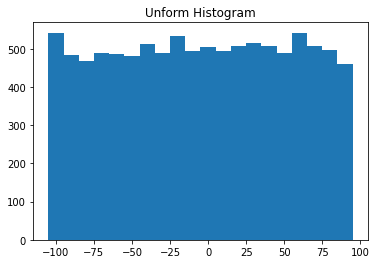

In [ ]:
plot_histogram(uniform,10,"Unform Histogram")

### 圖10-2 常態分布的直方圖


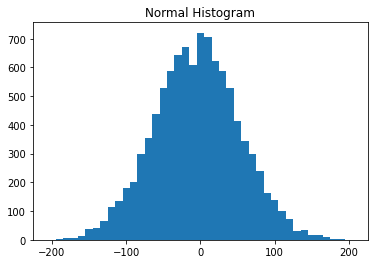

In [ ]:
plot_histogram(normal,10,"Normal Histogram")

# 二維的資料

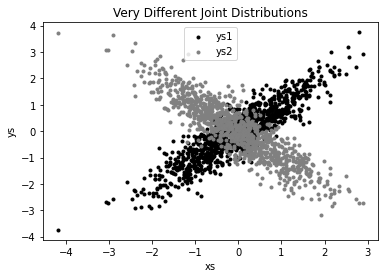

In [ ]:
def random_normal()->float:
  """送回一個從標準常態分布中隨機選取的是數字"""
  return inverse_normal_cdf(random.random())

xs=[random_normal() for _ in range(1000)]
ys1 = [x+random_normal()/2 for x in xs]
ys2 = [-x+random_normal()/2 for x in xs]

plt.scatter(xs,ys1,marker=".",color="black",label="ys1")
plt.scatter(xs,ys2,marker=".",color="gray",label="ys2")
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title("Very Different Joint Distributions")
plt.show()

使用「第五章 統計學」的函數

In [ ]:
import math
from typing import List
Vector = List[float]

def dot(v:Vector,w:Vector)->float:
  #計算v_1*w_1+... +v_n*w_n
  assert len(v)==len(w),"兩個向量必須有相同的維度"

  return sum(v_i*w_i for v_i,w_i in zip(v,w))

def sum_of_squares(v:Vector) -> float:
  return dot(v,v)

def mean(xs:List[float]) -> float:
  return sum(xs) / len(xs)

def de_mean(xs:List[float]) -> List[float]:
  x_bar = mean(xs)
  return [x - x_bar for x in xs] 

def standard_deviation(xs:List[float]) ->float:
  return math.sqrt(variance(xs))

def covariance(xs:List[float],ys:List[float]) ->float:
  assert len(xs)==len(ys),"xs與ys的元素必須是相同的0"
  
  return dot(de_mean(xs),de_mean(ys))/(len(xs)-1)

def variance(xs:List[float]) ->float:
  assert len(xs),"至少有兩個元素才能計算變異數"

  n = len(xs)
  deviations = de_mean(xs)
  return sum_of_squares(deviations) / (n-1)


def correlation(xs:List[float],ys:List[float]) ->float:

  stdev_x = standard_deviation(xs)
  stdev_y = standard_deviation(ys)
  if stdev_x > 0 and stdev_y > 0 :
    return covariance(xs,ys) / stdev_x / stdev_y
  else:
    return 0

In [ ]:
print(correlation(xs,ys1))
print(correlation(xs,ys2))

0.9010493686379609
-0.8920981526880033


# 多維的資料
利用對應的相關矩陣(correlation matrix)找出對應的相關係數

使用「第4章 線性代數」的函數

In [ ]:
from typing import List

Vector = List[float]
Matrix=List[List[float]] #另一種型別別名

from typing import Callable

#送回一個num_rows * num_cols 的矩陣，其中第(i,j)項就是entry_fn(i,j)
def make_matrix(num_rows:int,num_cols:int,entry_fn:Callable[[int,int],float])->Matrix:

  return [[ entry_fn(i,j)        # 給定 i ，就能建立長度為 j 的列表
        for j in range(num_cols)] # [entry_fn(i,0),...]
        for i in range(num_rows)] # 針對每個i都建立一個列表

In [ ]:
def correlation_matrix(data:List[Vector])->Matrix:
  """
  送回一個len(data[i]) x len(data[j])的矩陣，
  其中第(i,j)個元素值，就代表data[i]、data[j]的相關係數
  """
  def correlation_ij(i:int,j:int)->float:
    return correlation(data[i],data[j])
  
  return make_matrix(len(data),len(data),correlation_ij)

利用散點圖矩陣將兩兩成對的散點圖全部顯現出來

In [ ]:
from typing import List

# Just some random data to show off correlation scatterplots
num_points = 100

def random_row() -> List[float]:
    row = [0.0, 0, 0, 0]
    row[0] = random_normal()
    row[1] = -5 * row[0] + random_normal()
    row[2] = row[0] + row[1] + 5 * random_normal()
    row[3] = 6 if row[2] > -2 else 0
    return row

random.seed(0)    # each row has 4 points, but really we want the columns
corr_rows = [random_row() for _ in range(num_points)]

corr_data = [list(col) for col in zip(*corr_rows)]

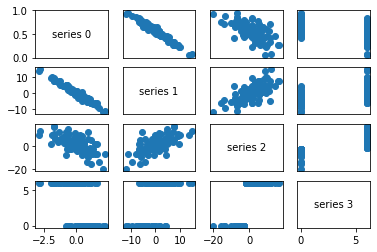

In [ ]:
#corr_data是一個list列表，內有四個100維向量
num_vectors = len(corr_data)
fig,ax= plt.subplots(num_vectors,num_vectors)

for i in range(num_vectors):
  for j in range(num_vectors):

    # 散點圖：column_j在x軸，column_i在y軸
    if i != j:ax[i][j].scatter(corr_data[j],corr_data[i])

    #如果i==j，就顯示序列名稱
    else:ax[i][j].annotate("series "+str(i),(0.5,0.5),xycoords="axes fraction",ha="center",va="center")

    #除了左邊和下面的圖形之外，隱藏軸上的標籤
    if i<num_vectors-1:ax[i][j].xaxis.set_visible(False)
    if j>0:ax[i][j].yaxis.set_visible(False)
  
  # 修正左上方與右下方圖形軸的標籤
  # 因為這些圖形裡只有文字
  ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
  ax[-1][-1].set_ylim(ax[0][-1].get_ylim())

plt.show()

# 使用NamedTuple


In [ ]:
import datetime

stock_price={
    "closing_price":102.96,
    "date":datetime.date(2014,8,29),
    "symbol":"AAPL"
}

我們常使用dict來儲存資料， 
藉由dict的鍵值來進行存取很容易出現問題。  
如果dict內的資料型別具有一致性，能採用以下型態標註：


```
prices:Dict[datetime.date,float]={ }
```



In [ ]:
from collections import namedtuple

StockPrice=namedtuple('StockPrice',["symbol","date","closing_price"])
price = StockPrice("MSFT",datetime.date(2018,12,14),106.03)

assert price.symbol =="MSFT"
assert price.closing_price == 106.03

使用定義物件的方式，藉此達到型別標註。

In [ ]:
from typing import NamedTuple

class StockPrice(NamedTuple):
  symbol:str
  date:datetime.date
  closing_price:float

  def is_high_tech(self) ->bool:
    """一個物件方法"""
    return self.symbol in ["MIST","GOOG","FB","AMZN","AAPL"]

price = StockPrice('MSFT',datetime.date(2018,12,14),106.03)

assert price.symbol == "MSFT"
assert price.closing_price == 106.03
assert price.is_high_tech() == False

## Dataclass 資料物件類別
可被視為NamedTuple的一種可變類別

In [ ]:
from dataclasses import dataclass

@dataclass
class StockPrice2:
  symbol:str
  date:datetime.date
  closing_price:float

  def is_high_tech(self) ->bool:
    """一個物件方法"""
    return self.symbol in ["MIST","GOOG","FB","AMZN","AAPL"]

price2 = StockPrice2('MSFT',datetime.date(2018,12,14),106.03)

assert price2.symbol == "MSFT"
assert price2.closing_price == 106.03
assert price2.is_high_tech() == False

在這個物件形式的保護下，不能直接修改參數

In [ ]:
price2.closing_price /= 2
assert price2.closing_price == 51.03

AssertionError: ignored

# 清理與轉換

In [ ]:
from dateutil.parser import parse

def parse_row(row:List[str]) -> StockPrice:
  symbol,date,closing_price = row
  return StockPrice(symbol=symbol,
           date =parse(date).date(),
           closing_price=float(closing_price))
#測試函式
stock = parse_row(['MSFT',"2018-12-14","106.03"])

assert stock.symbol == "MSFT"
assert stock.date == datetime.date(2018,12,14)
assert stock.closing_price == 106.03


假設有**不良資料**，我們可以使其得到的結果為None

In [ ]:
from typing import Optional
import re

def try_parse_row(row:List[str]) -> Optional[StockPrice]:
  symbol,date,closing_price = row
  
  #股票代號衣錠都是大寫
  if not re.match(r"^[A-Z]+$",symbol):
    return None
  try:
    date = parse(date).date()
  except ValueError:
    return None

  try:
    closing_price=float(closing_price)
  except ValueError:
    return None

  return StockPrice(symbol,date,closing_price)
           
#測試函式：若有誤則送回None
assert try_parse_row(['MSFT0',"2018-12-14","106.03"]) is None
assert try_parse_row(['MSFT0',"2018-12--14","106.03"]) is None
assert try_parse_row(['MSFT0',"2018-12-14","x"]) is None

#測試函式：若無誤則送回原本的資料
assert try_parse_row(['MSFT',"2018-12-14","106.03"]) == stock


# 處理資料

In [ ]:
from dateutil.parser import parse
import pandas as pd
import io
import requests
url="https://raw.githubusercontent.com/hank199599/data_science_from_scratch_reading_log/main/attached_data/CH%2010/stock.csv"
s=requests.get(url).content
data=pd.read_csv(io.StringIO(s.decode('utf-8')))



In [ ]:
appl = data["Symbol"]== "AAPL" #找出data中「Symbol」欄位是 "AAPL" 的篩選器
max(list(data[appl]["Close"]))

232.07000699999998

In [ ]:
from typing import Dict,List
from collections import defaultdict

appl = data["Symbol"]== "AAPL" #找出data中「Symbol」欄位是 "AAPL" 的篩選器
print("AAPL:",max(list(data[appl]["Close"])))

msft = data["Symbol"]== "MSFT" #找出data中「Symbol」欄位是 "MSFT" 的篩選器
print("MSFT:",max(list(data[msft]["Close"])))

goog = data["Symbol"]== "GOOG" #找出data中「Symbol」欄位是 "GOOG" 的篩選器
print("GOOG:",max(list(data[goog]["Close"])))

fb = data["Symbol"]== "FB" #找出data中「Symbol」欄位是 "FB" 的篩選器
print("FB:",max(list(data[fb]["Close"])))

AAPL: 232.07000699999998
MSFT: 115.610001
GOOG: 1268.329956
FB: 217.5


# 尺度調整

參見這個表格：

|人|身高(英吋)|身高(公分)|體重(磅)|
|----|---|----|----|
|A|63|160|150|
|B|67|170.2|160|
|C|70|177.8|171|

In [ ]:
from typing import List
import math

Vector = List[float]

def vector_sum(vectors:List[Vector]) -> Vector:
  #先檢查vertors這個向量列表是否為空
  assert vectors,"列表中沒有向量!"

  #檢查vertors 向量列表內的所有向量都具有相同的維度
  num_elements=len(vectors[0])
  assert all(len(v)==num_elements for v in vectors),"向量維度不一致"

  #所有vectors[i]相加起來，是結果的第i個元素值
  return [sum(vector[i] for vector in vectors) for i in range(num_elements)]

def subtrate( v:Vector, w:Vector) -> Vector:
  assert len(v) == len(w) #兩個向量必須有相同的維度

  return [ v_i-w_i for v_i,w_i in zip(v,w)]

def dot(v:Vector,w:Vector)->float:
  #計算v_1*w_1+... +v_n*w_n
  assert len(v)==len(w),"兩個向量必須有相同的維度"

  return sum(v_i*w_i for v_i,w_i in zip(v,w))

def sum_of_squares(v:Vector) -> float:
  return dot(v,v)

def squared_distance(v:Vector,w:Vector) -> float:
  return sum_of_squares(subtrate(v,w))

def distance(v:Vector,w:Vector) -> float:
  return math.sqrt(squared_distance(v,w))

## 1.以英吋衡量身高
B的最鄰近者是A

In [ ]:
print("a_to_b:",distance([63,150],[67,160]))
print("a_to_c:",distance([63,150],[70,171]))
print("b_to_c:",distance([67,150],[70,171]))

a_to_b: 10.770329614269007
a_to_c: 22.135943621178654
b_to_c: 21.213203435596427


## 2.以公分衡量身高
B的最鄰近者是C

In [ ]:
print("a_to_b:",distance([160,150],[170.2,160]))
print("a_to_c:",distance([160,150],[177.8,171]))
print("b_to_c:",distance([170.2,150],[177.8,171]))

a_to_b: 14.284257068535268
a_to_c: 27.52889391167034
b_to_c: 22.332935319836494


單位改變後造成結果隨之改變，為解決這個問題。  
需要調整資料的尺度，將其調整為平均值為0，標準差為1。  
將整個維度的值轉變為**「相對於平均值的標準變差」**

In [ ]:
from typing import Tuple

def scalar_multiply(c:float,v:Vector) -> Vector:
  return [c*v_i for v_i in v]

def vector_mean(vectors:List[Vector])->Vector:
  n=len(vectors)
  return scalar_multiply(1/n,vector_sum(vectors))

def variance(xs:List[float]) ->float:
  assert len(xs),"至少有兩個元素才能計算變異數"

  n = len(xs)
  deviations = de_mean(xs)
  return sum_of_squares(deviations) / (n-1)

def mean(xs:List[float]) -> float:
  return sum(xs) / len(xs)

def de_mean(xs:List[float]) -> List[float]:
  x_bar = mean(xs)
  return [x - x_bar for x in xs] 

def standard_deviation(xs:List[float]) ->float:
  return math.sqrt(variance(xs))

def scale(data:List[Vector])->Tuple[Vector,Vector]:
  """送回每個值得平均值與標準差"""
  dim=len(data[0])

  means=vector_mean(data)
  stdevs=[standard_deviation([vector[i] for vector in data]) for i in range(dim)]

  return means,stdevs

先計算出每個位置的平均值和標準差

In [ ]:
vectors = [[-3,-1,1],[-1,0,1],[1,1,1]]
means,stdevs = scale(vectors)

assert means == [-1,0,1]
assert stdevs == [2,1,0]

利用平均值和標準差來建立一個新的資料集

In [ ]:
def rescale(data:List[Vector])->List[Vector]:
  """
  調整輸入資料的尺度，讓每個位置轉換為平均值0、標準差1的資料
  (如果標準差為0，就保留原資料)
  """
  dim = len(data[0])
  means,stdevs = scale(data)

  #每個向量複製一份副本
  rescale = [v[:] for v in data]

  for v in rescale:
    for i in range(dim):
      if(stdevs[i]>0):
        v[i] = (v[i]-means[i]/stdevs[i])

## tqdm
用來顯示工作進度條的函式庫

In [ ]:
pip install tqdm

利用tqdm.tqdm將迭代的物件包起來，即可看到進度條

In [ ]:
import tqdm
import random

for i in tqdm.tqdm(range(100)):
  #進行某個耗時的動作
  _ =[random.random() for _ in range(1000000)]

100%|██████████| 100/100 [00:12<00:00,  7.90it/s]


進度條也可以被客製化，加入說明文字

In [ ]:
import tqdm
import random
from typing import List

def primes_up_to(n:int) ->List[int]:
  primes = [2]

  with tqdm.trange(3,n) as t:
    for i in t:
      #如果沒有比i小的質數能整除i，i就是一個質數
      i_is_prime = not any (i%p == 0 for p in primes)
      if i_is_prime:
        primes.append(i)
      
      t.set_description(f"{len(primes)} primes")
  
  return primes

In [ ]:
my_primes = primes_up_to(1000000)

36509 primes:  43%|████▎     | 434338/999997 [10:20<13:28, 699.91it/s]


KeyboardInterrupt: ignored

# 降減維度  
有時資料真正的維度並非與我們已知的有關連。  
因此需借助**主成分分析(PCA,principle component analysis)**提取一至多個維度史資料在該維度上展現最大的變異量。

## 主成分分析(PCA,principle component analysis)
1. 對資料進行轉換，使每個維度的平均值為0
2. 透過梯度運算找出變異量最大的方向
3. 得到主成分向量
---------------
4. 移除資料投影在第一主成分上的分量
5. 透過梯度運算找出變異量最大的方向
6. 得到另一個的主成分向量


In [ ]:
# 範例資料集
X = [
    [20.9666776351559,-13.1138080189357],
    [22.7719907680008,-19.8890894944696],
    [25.6687103160153,-11.9956004517219],
    [18.0019794950564,-18.1989191165133],
    [21.3967402102156,-10.8893126308196],
    [0.443696899177716,-19.7221132386308],
    [29.9198322142127,-14.0958668502427],
    [19.0805843080126,-13.7888747608312],
    [16.4685063521314,-11.2612927034291],
    [21.4597664701884,-12.4740034586705],
    [3.87655283720532,-17.575162461771],
    [34.5713920556787,-10.705185165378],
    [13.3732115747722,-16.7270274494424],
    [20.7281704141919,-8.81165591556553],
    [24.839851437942,-12.1240962157419],
    [20.3019544741252,-12.8725060780898],
    [21.9021426929599,-17.3225432396452],
    [23.2285885715486,-12.2676568419045],
    [28.5749111681851,-13.2616470619453],
    [29.2957424128701,-14.6299928678996],
    [15.2495527798625,-18.4649714274207],
    [26.5567257400476,-9.19794350561966],
    [30.1934232346361,-12.6272709845971],
    [36.8267446011057,-7.25409849336718],
    [32.157416823084,-10.4729534347553],
    [5.85964365291694,-22.6573731626132],
    [25.7426190674693,-14.8055803854566],
    [16.237602636139,-16.5920595763719],
    [14.7408608850568,-20.0537715298403],
    [6.85907008242544,-18.3965586884781],
    [26.5918329233128,-8.92664811750842],
    [-11.2216019958228,-27.0519081982856],
    [8.93593745011035,-20.8261235122575],
    [24.4481258671796,-18.0324012215159],
    [2.82048515404903,-22.4208457598703],
    [30.8803004755948,-11.455358009593],
    [15.4586738236098,-11.1242825084309],
    [28.5332537090494,-14.7898744423126],
    [40.4830293441052,-2.41946428697183],
    [15.7563759125684,-13.5771266003795],
    [19.3635588851727,-20.6224770470434],
    [13.4212840786467,-19.0238227375766],
    [7.77570680426702,-16.6385739839089],
    [21.4865983854408,-15.290799330002],
    [12.6392705930724,-23.6433305964301],
    [12.4746151388128,-17.9720169566614],
    [23.4572410437998,-14.602080545086],
    [13.6878189833565,-18.9687408182414],
    [15.4077465943441,-14.5352487124086],
    [20.3356581548895,-10.0883159703702],
    [20.7093833689359,-12.6939091236766],
    [11.1032293684441,-14.1383848928755],
    [17.5048321498308,-9.2338593361801],
    [16.3303688220188,-15.1054735529158],
    [26.6929062710726,-13.306030567991],
    [34.4985678099711,-9.86199941278607],
    [39.1374291499406,-10.5621430853401],
    [21.9088956482146,-9.95198845621849],
    [22.2367457578087,-17.2200123442707],
    [10.0032784145577,-19.3557700653426],
    [14.045833906665,-15.871937521131],
    [15.5640911917607,-18.3396956121887],
    [24.4771926581586,-14.8715313479137],
    [26.533415556629,-14.693883922494],
    [12.8722580202544,-21.2750596021509],
    [24.4768291376862,-15.9592080959207],
    [18.2230748567433,-14.6541444069985],
    [4.1902148367447,-20.6144032528762],
    [12.4332594022086,-16.6079789231489],
    [20.5483758651873,-18.8512560786321],
    [17.8180560451358,-12.5451990696752],
    [11.0071081078049,-20.3938092335862],
    [8.30560561422449,-22.9503944138682],
    [33.9857852657284,-4.8371294974382],
    [17.4376502239652,-14.5095976075022],
    [29.0379635148943,-14.8461553663227],
    [29.1344666599319,-7.70862921632672],
    [32.9730697624544,-15.5839178785654],
    [13.4211493998212,-20.150199857584],
    [11.380538260355,-12.8619410359766],
    [28.672631499186,-8.51866271785711],
    [16.4296061111902,-23.3326051279759],
    [25.7168371582585,-13.8899296143829],
    [13.3185154732595,-17.8959160024249],
    [3.60832478605376,-25.4023343597712],
    [39.5445949652652,-11.466377647931],
    [25.1693484426101,-12.2752652925707],
    [25.2884257196471,-7.06710309184533],
    [6.77665715793125,-22.3947299635571],
    [20.1844223778907,-16.0427471125407],
    [25.5506805272535,-9.33856532270204],
    [25.1495682602477,-7.17350567090738],
    [15.6978431006492,-17.5979197162642],
    [37.42780451491,-10.843637288504],
    [22.974620174842,-10.6171162611686],
    [34.6327117468934,-9.26182440487384],
    [34.7042513789061,-6.9630753351114],
    [15.6563953929008,-17.2196961218915],
    [25.2049825789225,-14.1592086208169]
]


### 圖 10-6 用錯座標軸的圖片


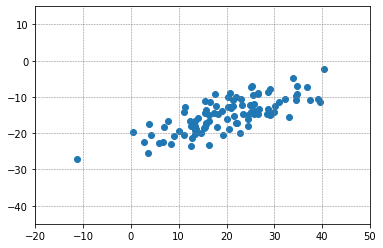

In [ ]:
import matplotlib.pyplot as plt

i=0
xs=[]
ys=[]
for item in X:
  xs.append(item[0])
  ys.append(item[1])

plt.scatter(xs,ys)

plt.axis([-20,50,-45,15])
plt.grid(True,linestyle = "--",color = 'gray' ,linewidth = '0.5',axis='both')
plt.show()

## 步驟一
對資料進行轉換，使每個維度的平均值變為零

In [ ]:
from typing import List

Vector = List[float]

def vector_sum(vectors:List[Vector]) -> Vector:
  #先檢查vertors這個向量列表是否為空
  assert vectors,"列表中沒有向量!"

  #檢查vertors 向量列表內的所有向量都具有相同的維度
  num_elements=len(vectors[0])
  assert all(len(v)==num_elements for v in vectors),"向量維度不一致"

  #所有vectors[i]相加起來，是結果的第i個元素值
  return [sum(vector[i] for vector in vectors) for i in range(num_elements)]

def subtrate( v:Vector, w:Vector) -> Vector:
  assert len(v) == len(w) #兩個向量必須有相同的維度

  return [ v_i-w_i for v_i,w_i in zip(v,w)]

def scalar_multiply(c:float,v:Vector) -> Vector:
  return [c*v_i for v_i in v]

def vector_mean(vectors:List[Vector])->Vector:
  n=len(vectors)
  return scalar_multiply(1/n,vector_sum(vectors))

In [ ]:

def de_mean(data:List[Vector]) ->List[Vector]:
  """調整資料的分布中心，讓每個維度的平均值變為0"""
  mean = vector_mean(data)
  return [subtrate(vector,mean) for vector in data]

### 圖 10-7 減去平均值之後的資料

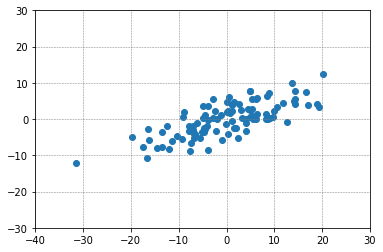

In [ ]:
new_data=de_mean(X)

i=0
xs1=[]
ys1=[]
for item in new_data:
  xs1.append(item[0])
  ys1.append(item[1])

plt.scatter(xs1,ys1)
plt.axis([-40,30,-30,30])
plt.grid(True,linestyle = "--",color = 'gray' ,linewidth = '0.5',axis='both')
plt.show()

具體來說，如果給定一個方向d(長度為1的向量)  
矩陣中的昧一行x投影在d方向上的分量，就是x與d的點積dot(x,d)  
且對於每個非零向量w來說，我們只要把其長度調整為1即可代表一個方向。

In [ ]:
import math

def magnitude(v:Vector)->float:
  return math.sqrt(sum_of_squares(v)) #math.sqrt 是計算平方根的一個函式

In [ ]:
def direction(w:Vector) ->Vector:
  mag = magnitude(w)
  return [w_i/mag for w_i in w]

只要給定一個非零向量w，我們即可計算出整組資料在w方向上的變異量：

In [ ]:
def dot(v:Vector,w:Vector)->float:
  #計算v_1*w_1+... +v_n*w_n
  assert len(v)==len(w),"兩個向量必須有相同的維度"

  return sum(v_i*w_i for v_i,w_i in zip(v,w))

In [ ]:
def directional_variance(data:List[Vector],w:Vector) ->float:
  """
  送回x在w這個方向上的變異量
  """
  w_dir = direction(w)
  return sum(dot(v,w_dir)**2 for v in data)

運用梯度遞減的方式，找出變化量最大的方向

In [ ]:
def directional_variance_gradient(data:List[Vector],w:Vector) ->Vector:
  """
  變異量相當於w這個方向的梯度
  """
  w_dir = direction(w)
  return [sum(2*dot(v,w_dir)*v[i] for v in data) for i in range(len(w))]

## 第一個主成分
使方向變異量directional_variance函式最大化的方向

In [ ]:
from typing import List

Vector = List[float]

def add( v:Vector, w:Vector) -> Vector:
  assert len(v) == len(w) ,"兩個向量必須有相同的維度"

  return [ v_i+w_i for v_i,w_i in zip(v,w)]

def dot(v:Vector,w:Vector)->float:
  #計算v_1*w_1+... +v_n*w_n
  assert len(v)==len(w),"兩個向量必須有相同的維度"

  return sum(v_i*w_i for v_i,w_i in zip(v,w))

def sum_of_squares(v:Vector) -> float:
  return dot(v,v)

def scalar_multiply(c:float,v:Vector) -> Vector:
  return [c*v_i for v_i in v]

def gradient_step(v:Vector,gradient:Vector,step_size:float) -> Vector:
  """從v沿著gradient的方向移動step_size的距離"""
  assert len(v) == len(gradient)
  step = scalar_multiply(step_size,gradient)
  return add(v,step)

In [ ]:
import tqdm
def first_principal_component(data:List[Vector],n:int=100,step_size:float=0.1)->Vector:
  #先從一個隨機的起始點開始
  guess=[1.0 for _ in data[0]]

  with tqdm.trange(n) as t:
    for _ in t:
      dv = directional_variance(data,guess)
      gradient = directional_variance_gradient(data,guess)
      guess = gradient_step(guess,gradient,step_size)
      t.set_description(f"dv:{dv:.3f}")
    return direction(guess)

In [ ]:
first_principal_component(new_data)  # 第一個主成分

dv:10279.151: 100%|██████████| 100/100 [00:00<00:00, 452.34it/s]


[0.9237307801943212, 0.3830423549969252]

### 圖 10-8 第一主成分

dv:10279.151: 100%|██████████| 100/100 [00:00<00:00, 452.80it/s]


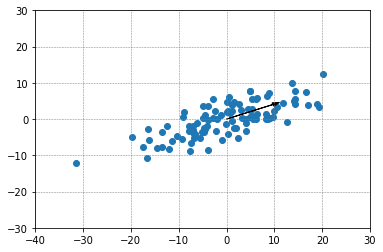

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

new_data=de_mean(X)

i=0
xs1=[]
ys1=[]
vector=first_principal_component(new_data)

for item in new_data:
  xs1.append(item[0])
  ys1.append(item[1])

plt.arrow(0, 0, 12*vector[0], 12*vector[1], length_includes_head=True, head_width=1,color = 'black')

plt.scatter(xs1,ys1)
plt.axis([-40,30,-30,30])
plt.grid(True,linestyle = "--",color = 'gray' ,linewidth = '0.5',axis='both')
plt.show()

一旦找到第一主成分的方向，  
我們可以把資料投影到該方向以找出該方向對應的值

In [ ]:
def project(v:Vector,w:Vector)->Vector:
  """送回v分量在w這個方向上的分量"""
  projection_length = dot(v,w)
  return scalar_multiply(projection_length,w)

如果要進一步找出其他主成分，  
首先要移除資料投影在第一主成分上的分量

In [ ]:
def remove_projection_from_vector(v:Vector,w:Vector) ->Vector:
  """把v減去v投影在w上的分量"""
  return subtrate(v,project(v,w))

In [ ]:
def remove_projection(data:List[Vector],w:Vector) ->List[Vector]:
  return [remove_projection_from_vector(v,w) for v in data]

由於這個資料及只有兩個維度。  
因此移除第一主成分後，只剩下一維的結果。

### 圖 10-9 移除第一主成分之後的資料

dv:821.030: 100%|██████████| 100/100 [00:00<00:00, 606.16it/s]


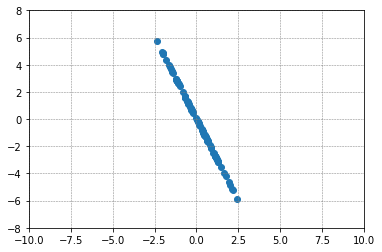

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

remove_projection=remove_projection(new_data,first_principal_component(new_data))

i=0
xs1=[]
ys1=[]
vector=first_principal_component(remove_projection)

for item in remove_projection:
  xs1.append(item[0])
  ys1.append(item[1])

plt.scatter(xs1,ys1)
plt.axis([-10,10,-8,8])
plt.grid(True,linestyle = "--",color = 'gray' ,linewidth = '0.5',axis='both')
plt.show()

接著，只要對「remove_projection」進行相同的操作，
就能得到第二個主成分

In [ ]:
first_principal_component(remove_projection) # 第二個主成分

dv:821.030: 100%|██████████| 100/100 [00:00<00:00, 505.89it/s]


[-0.3829683874572463, 0.9237614487563316]

### 圖 10-10 前兩個主成分

dv:821.030: 100%|██████████| 100/100 [00:00<00:00, 537.42it/s]


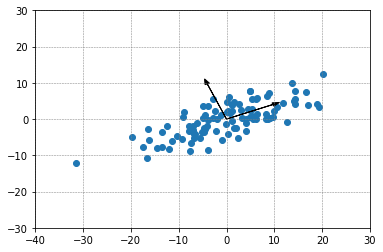

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

new_data=de_mean(X)

i=0
xs1=[]
ys1=[]
vector1=first_principal_component(new_data)
vector2=first_principal_component(removal)

for item in new_data:
  xs1.append(item[0])
  ys1.append(item[1])

plt.arrow(0, 0, 12*vector1[0], 12*vector1[1], length_includes_head=True, head_width=1,color = 'black')
plt.arrow(0, 0, 12*vector2[0], 12*vector2[1], length_includes_head=True, head_width=1,color = 'black')

plt.scatter(xs1,ys1)
plt.axis([-40,30,-30,30])
plt.grid(True,linestyle = "--",color = 'gray' ,linewidth = '0.5',axis='both')
plt.show()

# 其他情況：具較多維度的資料
使用類似的迭代方式，找出其中的主成分 
* 優點：消除維度雜訊，並整合高度相關的維度

In [ ]:
def pca(data:List[Vector],num_components:int)->List[Vector]:
  components:List[Vector]=[]
  for _ in range(num_components):
    component = first_principal_component(data)
    components.append(component)
    data = remove_projection(data,component)
  return components

接著將資料轉移到維度較低的空間中

In [ ]:
def transform_vector(v:Vector,component:List[Vector]) ->Vector:
  return[dot(v,w) for w in components]

def transform(data:List[Vector],components:List[Vector])->List[Vector]:
  return [transform_vector(v,components) for v in data]